Simple quick update latest weather

In [57]:
# Tell matplotlib to plot in line
%matplotlib inline

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()


In [58]:
infile = "../files/weather.csv"

!scp 192.168.0.127:Adafruit_Python_BMP/weather.csv ../files

weather.csv                                   100%   55KB  54.7KB/s   00:00    


In [59]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])


### Last 24 hours:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0474390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0312668>], dtype=object)

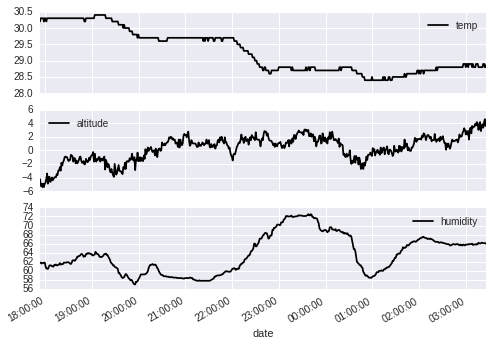

In [60]:
# reading is once a minute, so take last 24 * 60 readings
data[['temp', 'altitude', 'humidity']][-24*60:].plot(subplots=True)

### Last week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b02a90f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41b01a83c8>], dtype=object)

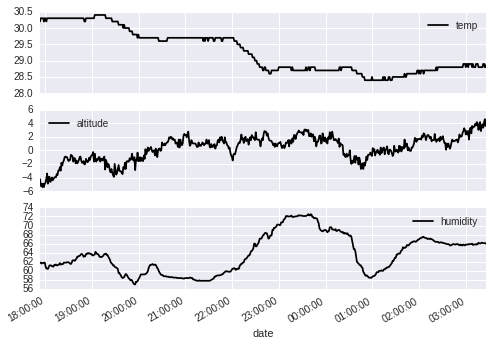

In [61]:
# reading is once a minute, so take last 7 * 24 * 60 readings
data[['temp', 'altitude', 'humidity']][-7*24*60:].plot(subplots=True)

## Look at all the data

In [62]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,29.274423,101321.207815,0.312342,101321.442274,63.630195,29.138899
std,0.657846,22.217570,1.879393,22.453308,4.282956,0.613197
min,28.400000,101270.000000,-5.410146,101272.000000,57.000000,28.299999
25%,28.700000,101305.000000,-0.999008,101306.000000,59.799999,28.600000
50%,28.900000,101317.000000,0.749319,101317.000000,63.200001,28.799999
75%,29.700000,101337.000000,1.581958,101337.000000,66.500000,29.500000
max,30.400000,101388.000000,4.580011,101394.000000,72.500000,30.200001


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

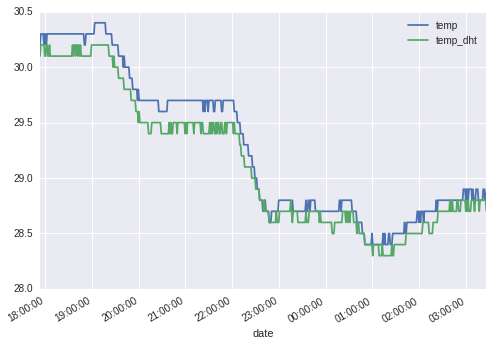

In [63]:
data[['temp', 'temp_dht']].plot()

## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [64]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

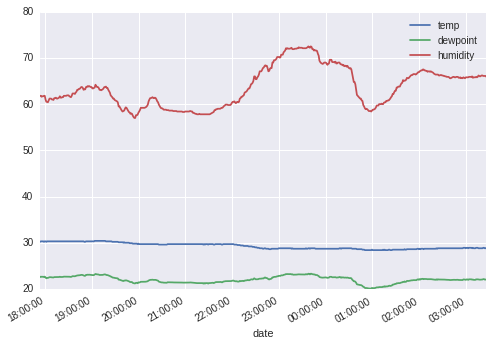

In [65]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b00d2b38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41afec0d68>], dtype=object)

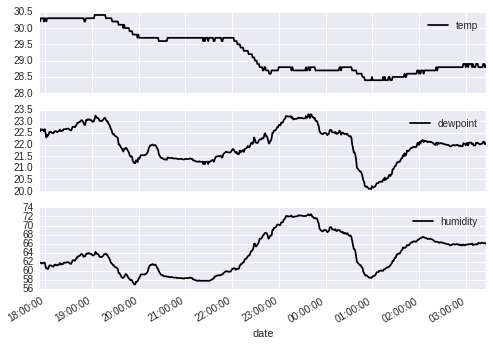

In [66]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)